# Exercise 02: Data Normalization

In this exercise, you will explore the effects of data normalization (shifting and scaling).

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

The following function generates two datasets.  You don't need to know how it works...

In [4]:
import numpy as np

def generate_data ():
    N_samples = 100
    Sigma = [
        [ 1.0, 0.9 ],
        [ 0.9, 1.0 ]
    ]
    
    X_1 = np.random.default_rng().multivariate_normal([0.0, 0.0], Sigma, N_samples)
    X_2 = np.copy(X_1);
    X_2[:,0] = X_2[:,0]*1000 + 3000;
    X_2[:,1] = X_2[:,1] + 50;

    return (X_1, X_2)

X_1, X_2 = generate_data()

Let's take a look at a scatterplot of the first dataset.

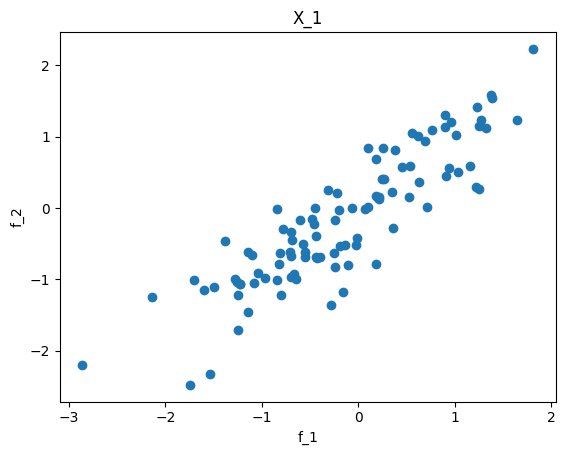

In [5]:
import matplotlib.pyplot as plt

ax_1 = plt.gca()
plt.scatter(X_1[:,0], X_1[:,1]);
plt.title('X_1')
ax_1.set_xlabel('f_1')
ax_1.set_ylabel('f_2');

**Are these two features highly correlated?**

I would guess yes, as they seem to track with each other.

Now let's take a look at the second dataset.

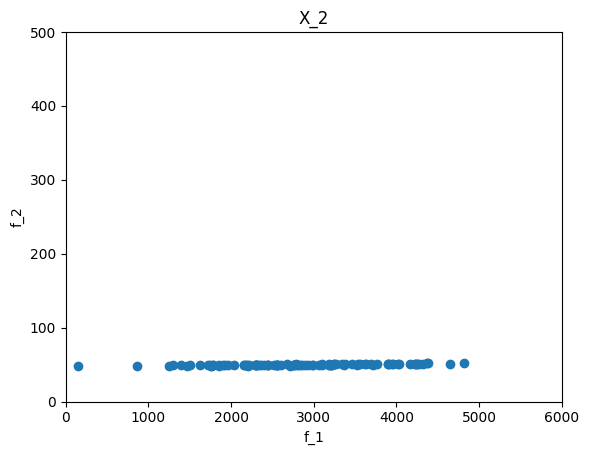

In [6]:
ax_2 = plt.gca()
plt.scatter(X_2[:,0], X_2[:,1]);
plt.title('X_2')
ax_2.set_ylim(0, 500)
ax_2.set_xlim(0, 6000)
ax_2.set_xlabel('f_1')
ax_2.set_ylabel('f_2');

**Are these features highly correlated?**

This scale seems suspicious. It is possible that they are highly correlated, but I feel that we are zoomed out here..

Let's see if seaborn's `pairplot` agrees.

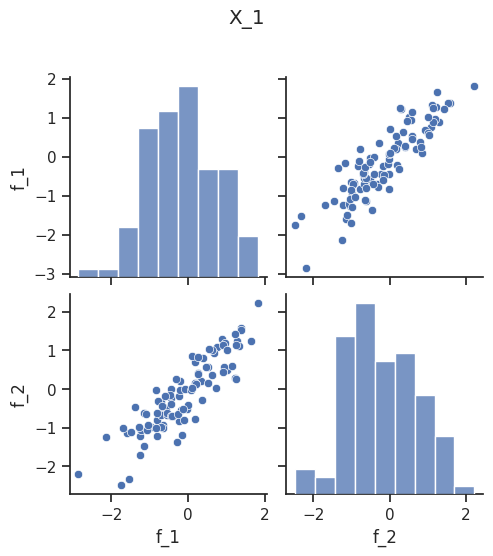

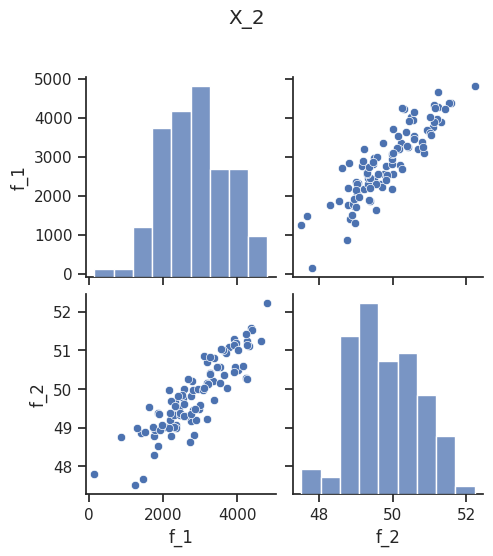

In [7]:
import seaborn as sns
import pandas as pd

sns.set(style="ticks", color_codes=True)

df_1 = pd.DataFrame(
    data=X_1,
    columns=['f_1', 'f_2']
)

df_2 = pd.DataFrame(
    data=X_2,
    columns=['f_1', 'f_2']
)

g_1 = sns.pairplot(df_1)
g_1.fig.suptitle('X_1', y=1.1);

g_2 = sns.pairplot(df_2)
g_2.fig.suptitle('X_2', y=1.1);

**According to the plots above, are the features strongly correlated in one dataset or both?**

I would say that the features are strongly correlated in both.

**Explain why the original plots didn't show all of the correlations.**

The original plots had a perspective that was zoomed incorrectly. In the second data set we have a y axis that reaches to 400, but the data caps out around 52.